# Importing Libraries

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading Dataset

In [173]:
df = pd.read_csv("C:\\Users\\kiran\\Downloads\\force2020_data.csv")

In [174]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


# Inspecting Dataset

In [175]:
df.shape

(18270, 6)

In [176]:
df.size

109620

In [177]:
df_cols = df.columns.tolist()
df_cols

['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']

In [178]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


<Axes: >

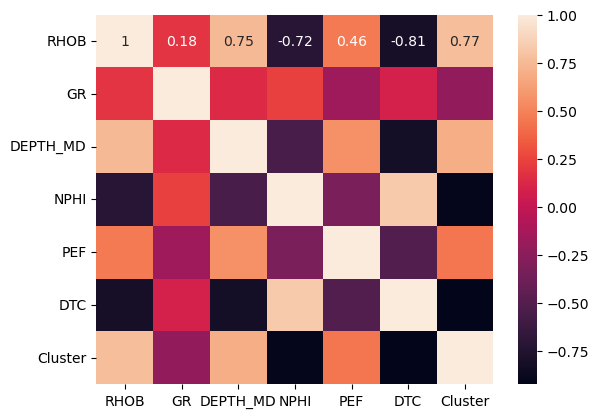

In [208]:
sns.heatmap(df.corr(),annot= True)

In [ ]:
# NPHI and DTC has have positive correlation.

# Dropping Duplicates 

In [180]:
duplicate_rows = df.duplicated().sum()

# Checking Missing Values

In [181]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [182]:
df.isna().sum()/df.shape[0] *100

RHOB         0.000000
GR           0.000000
DEPTH_MD     0.000000
NPHI        23.196497
PEF         10.016420
DTC          0.443350
dtype: float64

## Handling Missing Values

### Checking Histogram for data imputation

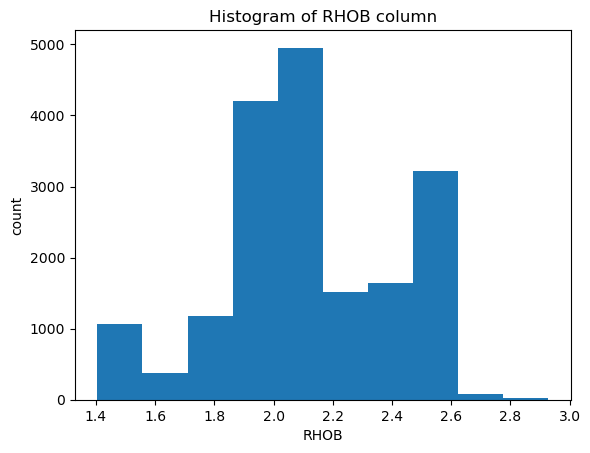

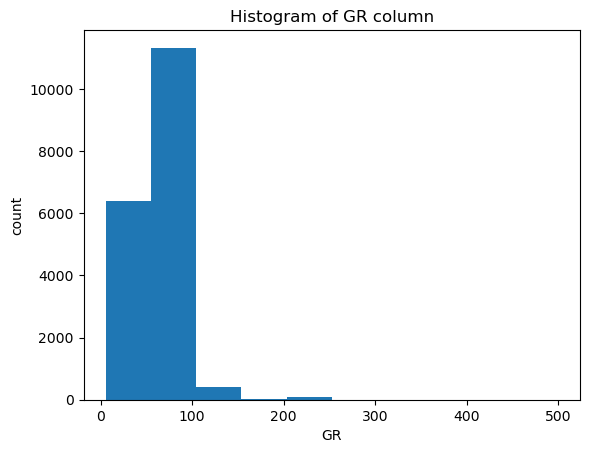

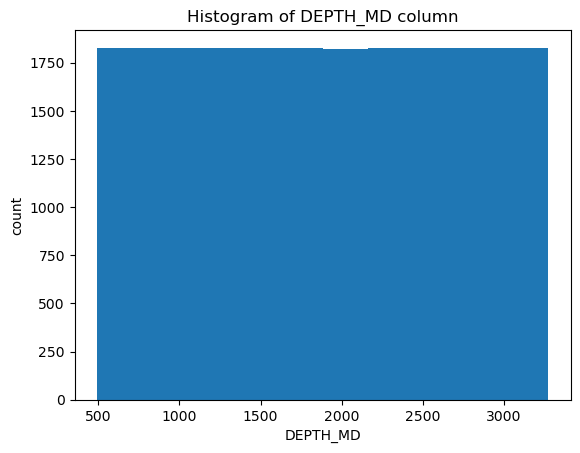

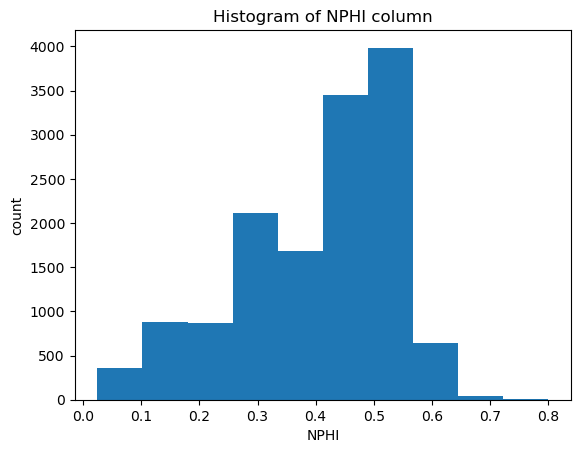

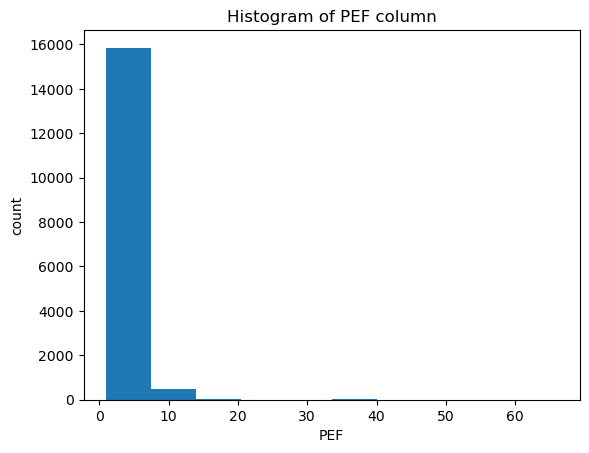

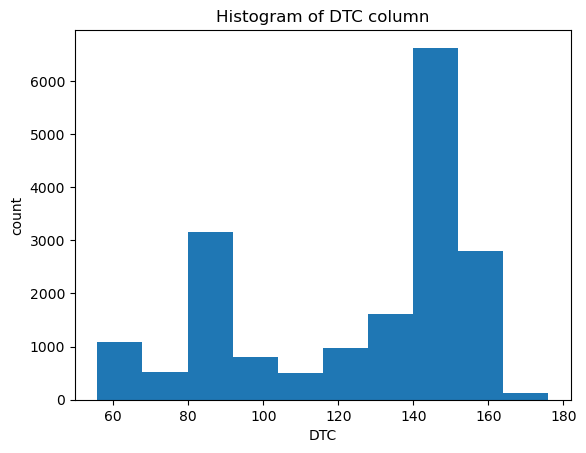

In [183]:
#fig, ax = plt.subplots(2, 3)
#for i in ax:\
for col in df_cols:
    plt.hist(df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [184]:
# Both PEF and NHPI columns are right skewed
# So we can fill the missing values with median
# Also DTC has a bimodal curve so we can assume that there are 2 or 3 clusters.

### Filling Missing Values

In [185]:
for col in df_cols:
  df[col] = df[col].fillna(df[col].median())

In [186]:
# Sanity check to see if missing values are filled
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

# Outlier Handling

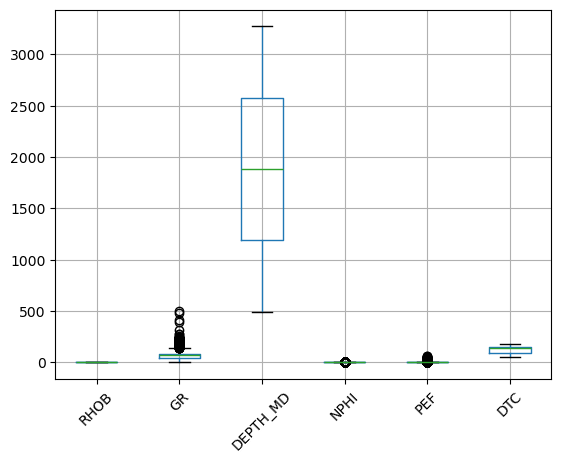

In [187]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()


In [188]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [189]:
for col in df_cols:
  df[col] = remove_outliers(df, col)

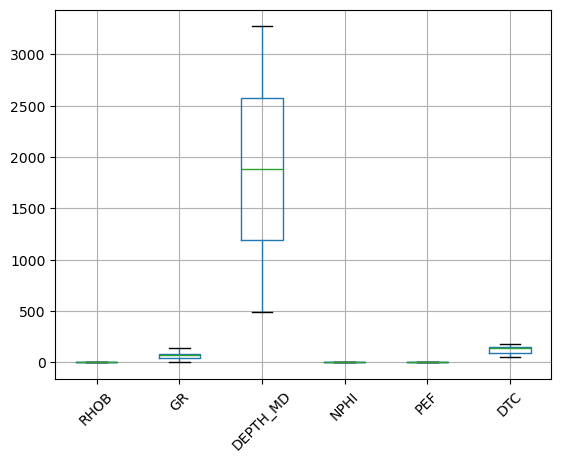

In [190]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

# Feature Scaling

In [191]:
# min max scaling
min_scaler = MinMaxScaler()
df_colms = ['RHOB','GR','DEPTH_MD', 'NPHI', 'PEF','DTC']
df[df_colms] = min_scaler.fit_transform(df[df_colms])
df[df_colms]

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.561250,0.000000,0.551910,1.000000,0.876716
1,0.318528,0.554137,0.000055,0.551910,1.000000,0.872327
2,0.322946,0.520460,0.000109,0.551910,1.000000,0.868752
3,0.319919,0.505724,0.000164,0.551910,1.000000,0.868550
4,0.312121,0.497005,0.000219,0.551910,1.000000,0.868375
...,...,...,...,...,...,...
18265,0.804586,0.100310,0.999781,0.109837,0.319385,0.711771
18266,0.813056,0.115670,0.999836,0.106045,0.319385,0.711771
18267,0.838124,0.124789,0.999891,0.089936,0.319385,0.711771
18268,0.875567,0.121807,0.999945,0.087466,0.319385,0.711771


# K Means Clustering

In [192]:
X = df[['NPHI','DTC']]

In [193]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=500, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

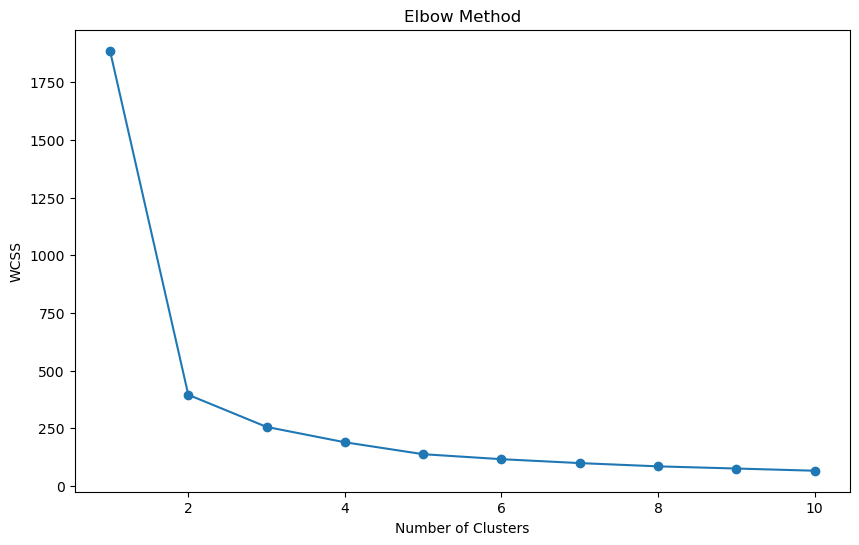

In [194]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [201]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 15, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [202]:
# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,0.314847,0.561250,0.000000,0.55191,1.0,0.876716,0
1,0.318528,0.554137,0.000055,0.55191,1.0,0.872327,0
2,0.322946,0.520460,0.000109,0.55191,1.0,0.868752,0
3,0.319919,0.505724,0.000164,0.55191,1.0,0.868550,0
4,0.312121,0.497005,0.000219,0.55191,1.0,0.868375,0


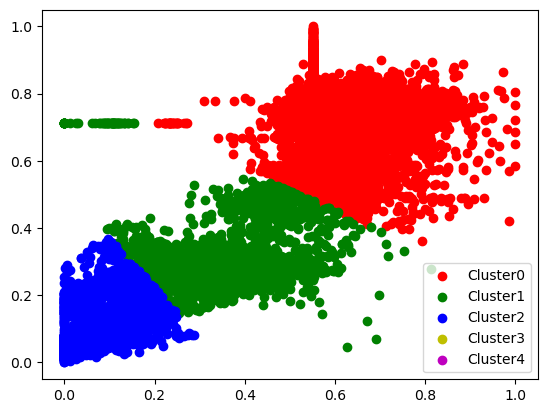

In [203]:
# assigning custom colors to clusters
colors = ['r','g','b','y']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['NPHI'],
              cluster_data['DTC'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [204]:
# function to predict cluster for a new fish
def predict_cluster(NPHI, DTC):
  new_data = [[NPHI,DTC]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [205]:
# example
n_NPHI = 0.3
n_DTC = 0.4

predicted_cluster = predict_cluster(n_NPHI,n_DTC)
print(f'The data belongs to cluster: {predicted_cluster}')

The data belongs to cluster: 1


C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [206]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.67094090279287
